In [31]:
!pip install ucimlrepo

In [32]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5, 6.5))
forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
Y = forest_fires.data.targets

df = pd.DataFrame(data=X, columns=forest_fires.feature_names)
df['target'] = Y

print(forest_fires.metadata)




{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

<Figure size 650x650 with 0 Axes>

 Variables info for the forest fires dataset, showing names, types, and metadata.

In [33]:
forest_fires.variables

,name,role,type,demographic,description,units,missing_values
0,X,Feature,Integer,None,x-axis spatial coordinate within the Montesinh...,None,no
1,Y,Feature,Integer,None,y-axis spatial coordinate within the Montesinh...,None,no
2,month,Feature,Categorical,None,month of the year: 'jan' to 'dec',None,no
3,day,Feature,Categorical,None,day of the week: 'mon' to 'sun',None,no
4,FFMC,Feature,Continuous,None,FFMC index from the FWI system: 18.7 to 96.20,None,no
5,DMC,Feature,Integer,None,DMC index from the FWI system: 1.1 to 291.3,None,no
6,DC,Feature,Continuous,None,DC index from the FWI system: 7.9 to 860.6,None,no
7,ISI,Feature,Continuous,None,ISI index from the FWI system: 0.0 to 56.10,None,no
8,temp,Feature,Continuous,None,temperature: 2.2 to 33.30,Celsius degrees,no
9,RH,Feature,Integer,None,relative humidity: 15.0 to 100,%,no


First 10 rows of the DataFrame df

In [34]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


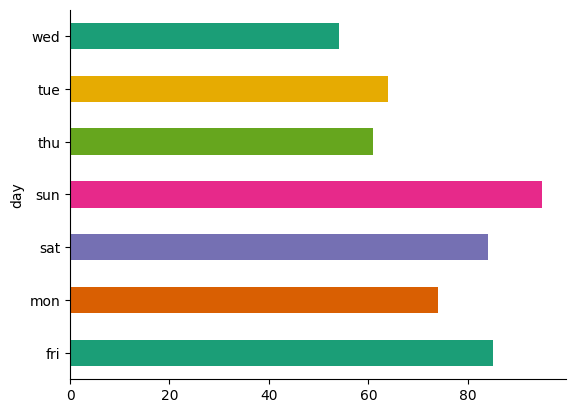

In [35]:
# @title day

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Statistical description of the DataFrame df, including count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.

In [36]:
print("Statistical Description:")
df.describe()

Statistical Description:


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Data types of each column in the DataFrame df

In [37]:
print("Data Types:", df.dtypes)

Data Types: X           int64
Y           int64
month      object
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
target    float64
dtype: object


 Calculates the Pearson correlation coefficients between pairs of columns in the DataFrame df

In [38]:
print("Correlation:", df.corr(method='pearson'))

Correlation:                X         Y      FFMC       DMC        DC       ISI      temp  \
X       1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y       0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC   -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC    -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC     -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI     0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp   -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH      0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind    0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain    0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
target  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

              RH      wind

<ipython-input-38-bbb1347b426d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation:", df.corr(method='pearson'))


The histogram represents the distribution of values in the 'target' column. The x-axis represents the range of values in the 'target' column, and the y-axis represents the frequency or count of occurrences of each value.

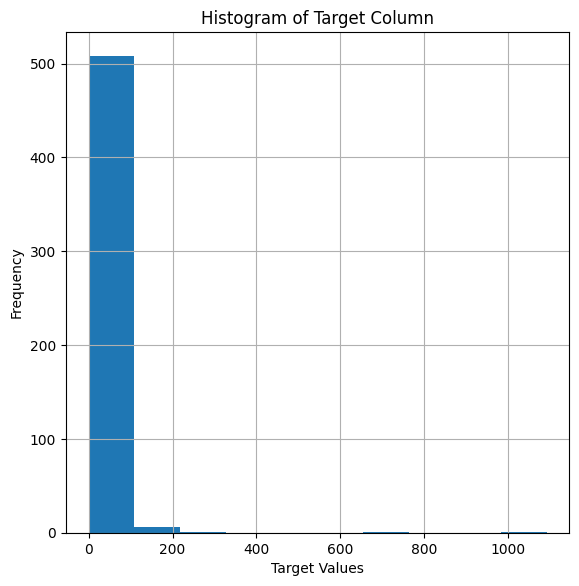

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6.5, 6.5))
df['target'].hist()

plt.title('Histogram of Target Column')
plt.xlabel('Target Values')
plt.ylabel('Frequency')

plt.show()

Histograms for each column in the DataFrame using a specified layout. Each histogram represents the distribution of values for a particular feature or variable.

<Figure size 650x650 with 0 Axes>

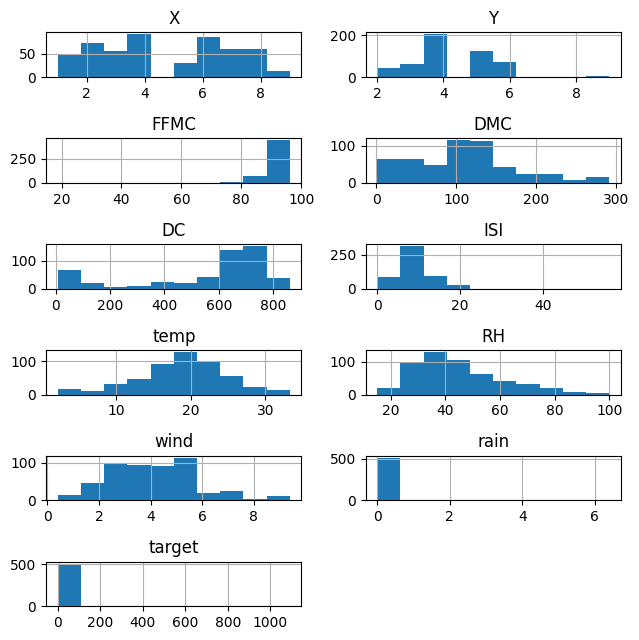

In [40]:
n_cols = len(df.columns)
layout = (n_cols // 2, 2)

plt.figure(figsize=(6.5, 6.5))
df.hist(layout=layout, figsize=(6.5, 6.5))
plt.tight_layout()
plt.show()

 A heatmap representing the correlation matrix of the DataFrame df. Each cell in the heatmap represents the correlation coefficient between two variables. The color intensity indicates the strength and direction of the correlation: darker colors indicate stronger positive correlations, lighter colors indicate weaker correlations, and negative correlations are represented by contrasting colors. The color bar on the side indicates the correlation values corresponding to the colors in the heatmap.

<ipython-input-41-fa0849db05e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(df.corr(), vmin=-1, vmax=1)


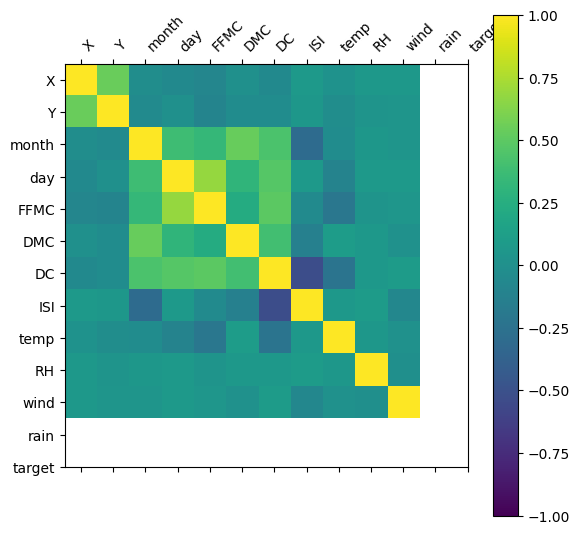

In [41]:
import numpy as np
fig, ax = plt.subplots(figsize=(6.5, 6.5))
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=45, ha='left')
ax.set_yticklabels(df.columns)

plt.show()

A bar plot showing the average target value for each month. The x-axis represents the months, the y-axis represents the average target value, and each bar represents the average target value for a specific month.




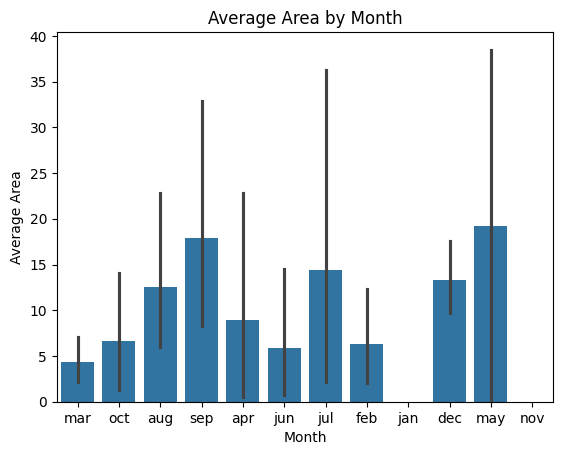

In [42]:
sns.barplot(x='month', y='target', data=df)
plt.title('Average Area by Month')
plt.xlabel('Month')
plt.ylabel('Average Area')
plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-43-841f56242b70>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['target'],shade=True,color='g')


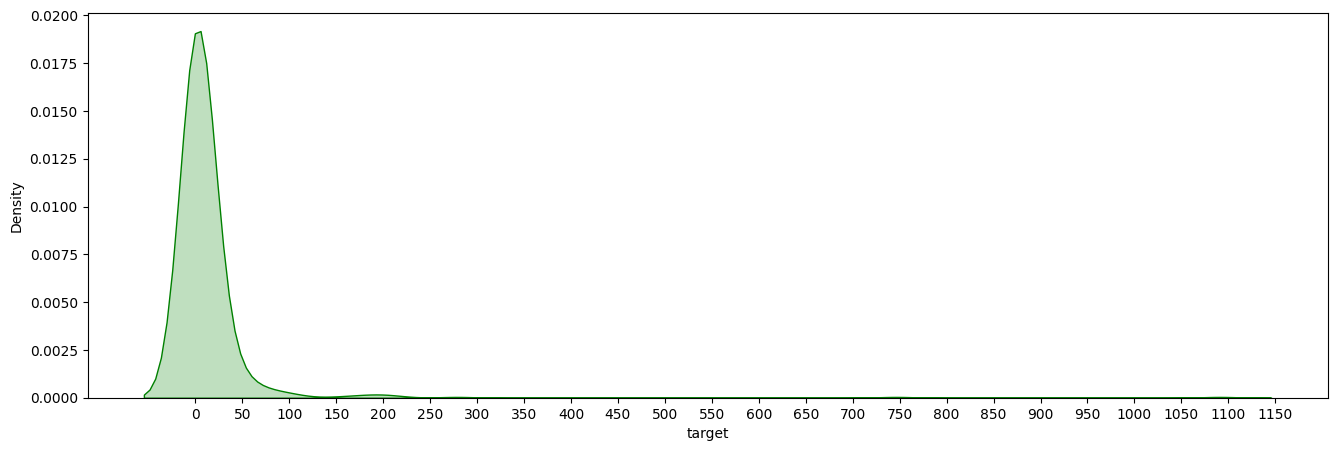

In [43]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['target'].skew()))
print("Kurtosis: {}".format(df['target'].kurtosis()))
ax = sns.kdeplot(df['target'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

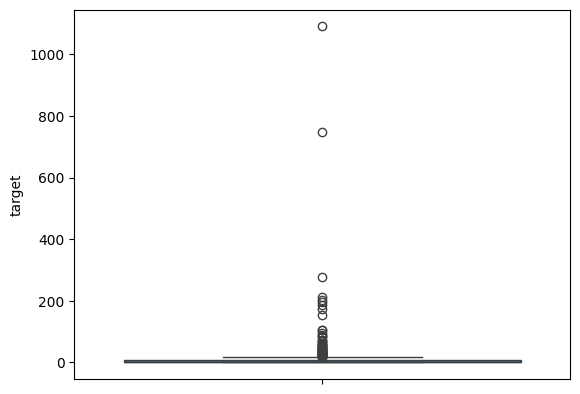

In [44]:
ax = sns.boxplot(df['target'])

Few observations:

The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [45]:
from scipy.stats import zscore
y_outliers = df[abs(zscore(df['target'])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [46]:
dfa = df.drop(columns='target')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])